In [1]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm

In [2]:
alpha = random()
beta = random()
x = np.arange(0, 1, 0.01)

In [3]:
y = [alpha * i + beta + random() for i in x]

In [4]:
def f_linear(x, a, b):
    return a * x + b

In [5]:
def f_rational(x, a, b):
    return a / (1 + b * x)

In [100]:
def least_square_1(ab):
    a, b = ab
    global x, y
    global f_linear
    return np.sum(2 * x * (f_linear(x, a, b) - y) + 2 * (f_linear(x, a, b) - y)) # derivative
    

## Linear

#### Gradient Descent


In [101]:
def gradient_desc_linear(x, y):
    eval = 0
    a = 0 
    b = 0 

    L = 0.001 
    epochs = 100000 

    n = int(len(x))

    for i in range(epochs): 
        Y_pred = a*x + b  # The current predicted value of Y
        D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
        a = a - L * D_m  # Update a
        b = b - L * D_c  # Update b
        eval += 5
        diff = least_square_1((a, b))
        if np.all(np.abs(diff) <= 1/(epochs)):
            print("Criterion stop, iterations = ", i)
            print("Function evaluations = ", eval)
            break
        
    return a, b

In [98]:
a_, b_ = gradient_desc_linear(x,y)

Criterion stop, iterations =  80521
Function evaluations =  402610


In [133]:
a_, b_

(0.7228510144111928, 1.5251430143759919)

#### Conjugate Gradient

In [53]:
def least_square(ab, x, y):
    a, b = ab
    J = (((a*x + b) - y)**2).sum()
    return J

In [54]:
res = scipy.optimize.minimize(least_square, [alpha, beta], args=(x, y), method='CG')

In [58]:
res

     fun: 8.333876191024814
     jac: array([3.57627869e-07, 1.19209290e-06])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([0.72284942, 1.52514386])

In [62]:
a_1, b_1 = res.x

### LM method

In [59]:
from scipy.optimize import curve_fit

In [15]:
res_lm_curve, pcov = curve_fit(f_linear, x, y, method='lm')

In [60]:
a_2, b_2 = res_lm_curve

#### BFGS

In [63]:
res = minimize(least_square, [alpha, beta], args=(x, y), method='BFGS')
res

      fun: 8.333876191024812
 hess_inv: array([[ 0.7839761 , -0.41162802],
       [-0.41162802,  0.2211847 ]])
      jac: array([7.15255737e-07, 9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([0.72284942, 1.52514386])

In [64]:
a_3, b_3 = res.x

In [18]:
res_lm_curve_rat, pcov = curve_fit(f_rational, x, y, method='lm')

In [19]:
res_lm_curve_rat

array([ 1.57791599, -0.3086097 ])

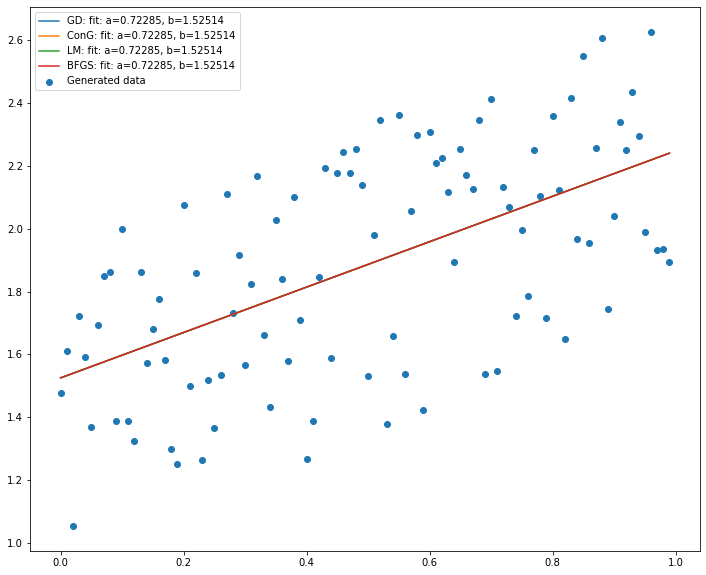

In [75]:
plt.figure(figsize=(12,10))
plt.scatter(x, y, label='Generated data') 
plt.plot(x, f_linear(x, a_, b_), '-', label='GD: fit: a=%5.5f, b=%5.5f' % (a_, b_))
plt.plot(x, f_linear(x, a_1, b_1), '-', label='ConG: fit: a=%5.5f, b=%5.5f' % (a_1, b_1))
plt.plot(x, f_linear(x, a_2, b_2), '-', label='LM: fit: a=%5.5f, b=%5.5f' % (a_2, b_2))
plt.plot(x, f_linear(x, a_3, b_3), '-', label='BFGS: fit: a=%5.5f, b=%5.5f' % (a_3, b_3))
plt.legend()
plt.show()

## Rational

In [83]:
def least_square_rat(ab, x, y):
    a, b = ab
    J = (((a / (1 + b*x)) - y)**2).sum()
    return J

In [102]:
def gradient_desc_rat(x, y):
    m = 0 
    c = 0 

    L = 0.001 
    epochs = 100000 

    n = int(len(x))

    for i in range(epochs): 
        Y_pred = m / (1 + x * c) # The current predicted value of Y
        D_c = sum( -2*m*x*(m-y*(c*x+1)) / (c*x+1)**3)
        D_m = sum( - 2 *(c * x *y -m + y ) / (c*x + 1)**2)
        m = m - L * D_m
        c = c - L * D_c
        diff = least_square_1((m, c))
        if np.all(np.abs(diff) <= 1/(epochs)):
            print("Criterion stop, iterations = ", i)
            print("Function evaluations = ", eval)
            break
        
    return m, c

In [134]:
m_, c_ = gradient_desc_rat(x, y)

In [135]:
m_,c_

(1.5779171086381767, -0.3086087076180443)

### CG

In [104]:
res = scipy.optimize.minimize(least_square_rat, [alpha, beta], args=(x, y), method='CG')

In [106]:
res

     fun: 8.478494050761
     jac: array([-3.57627869e-07,  2.74181366e-06])
 message: 'Optimization terminated successfully.'
    nfev: 99
     nit: 13
    njev: 33
  status: 0
 success: True
       x: array([ 1.57791707, -0.30860874])

In [105]:
m_1, c_1 = res.x

In [110]:
m_1, c_1

(1.5779170671471576, -0.30860873643997067)

### LM

In [107]:
res_lm_curve, pcov = curve_fit(f_rational, x, y, method='lm')

In [108]:
m_2, c_2 = res_lm_curve

In [111]:
m_2, c_2

(1.5779159877519227, -0.3086097006965194)

### BFGS

In [112]:
res = minimize(least_square_rat, [alpha, beta], args=(x, y), method='BFGS')
res

      fun: 8.478494050761089
 hess_inv: array([[0.01329359, 0.0087152 ],
       [0.0087152 , 0.00776436]])
      jac: array([-2.38418579e-07,  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 11
     njev: 18
   status: 0
  success: True
        x: array([ 1.57791705, -0.30860876])

In [113]:
m_3, c_3 = res.x

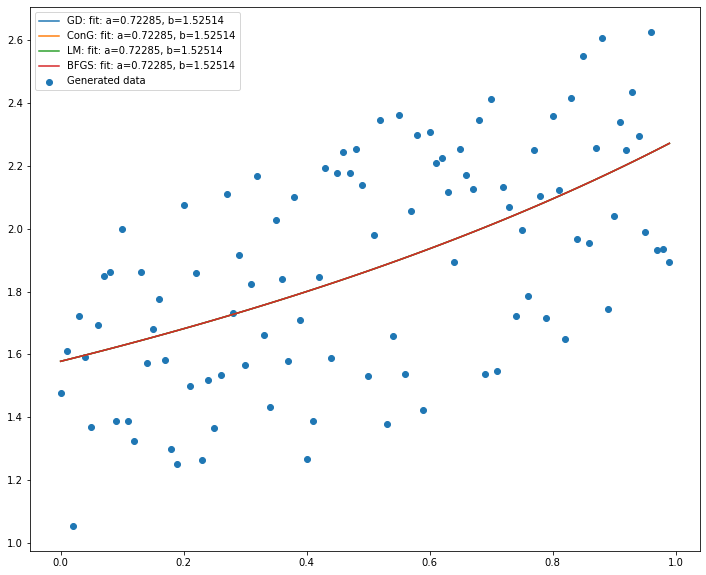

In [114]:
plt.figure(figsize=(12,10))
plt.scatter(x, y, label='Generated data') 
plt.plot(x, f_rational(x, m_, c_), '-', label='GD: fit: a=%5.5f, b=%5.5f' % (a_, b_))
plt.plot(x, f_rational(x, m_1, c_1), '-', label='ConG: fit: a=%5.5f, b=%5.5f' % (a_1, b_1))
plt.plot(x, f_rational(x, m_2, c_2), '-', label='LM: fit: a=%5.5f, b=%5.5f' % (a_2, b_2))
plt.plot(x, f_rational(x, m_3, c_3), '-', label='BFGS: fit: a=%5.5f, b=%5.5f' % (a_3, b_3))
plt.legend()
plt.show()

In [125]:
def f_r(ab):
    global x
    global y
    a,b = ab
    return (a / (1 + b * x)) - y

In [126]:
res_lm = scipy.optimize.least_squares(f_r, [alpha, beta], method='lm')

In [129]:
res_lm

 active_mask: array([0, 0])
        cost: 4.2392470253807675
         fun: array([ 0.10010823, -0.02763126,  0.53467267, -0.12920089,  0.0064793 ,
        0.2347382 , -0.08453832, -0.23749149, -0.24444613,  0.23573527,
       -0.37240425,  0.24414798,  0.31605213, -0.2172832 ,  0.0778123 ,
       -0.02725058, -0.11648272,  0.08306992,  0.37350331,  0.42431395,
       -0.39543011,  0.18958254, -0.16504215,  0.43530095,  0.1851235 ,
        0.34326258,  0.18019089, -0.38868832, -0.00475674, -0.18381074,
        0.171581  , -0.080476  , -0.41748543,  0.09470255,  0.3310871 ,
       -0.26020242, -0.06347255,  0.20337171, -0.3138944 ,  0.08390102,
        0.53223502,  0.42018752, -0.03351441, -0.37486972,  0.23690004,
       -0.34621611, -0.40671839, -0.33081152, -0.40079024, -0.28196032,
        0.33490755, -0.1088548 , -0.46808296,  0.50970758,  0.23584932,
       -0.46218712,  0.36918977, -0.14253953, -0.37708782,  0.50638651,
       -0.37194317, -0.26449268, -0.27506702, -0.15882469,  0

In [130]:
def f_l(ab):
    global x
    global y
    a,b = ab
    return (a*x + b) - y

In [131]:
res_lm_lin = scipy.optimize.least_squares(f_l, [alpha, beta], method='lm')

In [132]:
res_lm_lin

 active_mask: array([0, 0])
        cost: 4.166938095512405
         fun: array([ 0.04733488, -0.07806077,  0.48655664, -0.17503404, -0.03710188,
        0.1933778 , -0.12370945, -0.27450513, -0.27933437,  0.20294003,
       -0.40313919,  0.21544031,  0.2893384 , -0.24203665,  0.05498514,
       -0.04818576, -0.13556057,  0.06581442,  0.35803481,  0.41059679,
       -0.40743196,  0.17925961, -0.17372292,  0.42822525,  0.17961537,
        0.33928416,  0.17770393, -0.38972244, -0.00437704, -0.18205663,
        0.1746697 , -0.07609295, -0.41184866,  0.10155198,  0.3391077 ,
       -0.25105256, -0.05323578,  0.2146526 , -0.30161264,  0.09713995,
        0.54638698,  0.43520787, -0.01767077, -0.35824838,  0.25425303,
       -0.32817805, -0.38804233, -0.31154504, -0.38098143, -0.26165781,
        0.35565461, -0.08771288, -0.44659642,  0.53148794,  0.25787214,
       -0.43997377,  0.39154113, -0.12010326, -0.35462035,  0.52883087,
       -0.34957685, -0.24225995, -0.25302408, -0.13702837,  0.